In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

import FV3log

## Extract data from logfile

In [2]:
# global variables for convenience
maindir = "/Users/zhuangjw/Research/Computing/FV3/outputlog/"
var_list = ['plume0{0}'.format(i) for i in range(1,5)]
var_list

['plume01', 'plume02', 'plume03', 'plume04']

In [3]:
# Extract all results!
Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

ds = FV3log.extract_HsVs(maindir, var_list, Hres_list, Vres_list)
ds


 open: C48L20_std.log C48L40_std.log C48L80_std.log C48L160_std.log 
 open: C96L20_std.log C96L40_std.log C96L80_std.log C96L160_std.log 
 open: C192L20_std.log C192L40_std.log C192L80_std.log C192L160_std.log 
 open: C384L20_std.log C384L40_std.log C384L80_std.log C384L160_std.log 

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4, time: 9)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres, time) float32 1.0 0.884535 0.541212 0.319658 ...
    plume02  (Hres, Vres, time) float32 1.0 0.953083 0.627592 0.48241 ...
    plume03  (Hres, Vres, time) float32 1.0 0.66268 0.372343 0.251123 ...
    plume04  (Hres, Vres, time) float32 1.0 0.774934 0.533533 0.388228 ...

## Plot timeseries of maxVMR

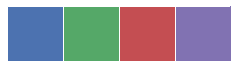

In [4]:
palette = sns.color_palette()[0:4]
#palette = sns.light_palette("navy")[-4:]
sns.palplot(palette)

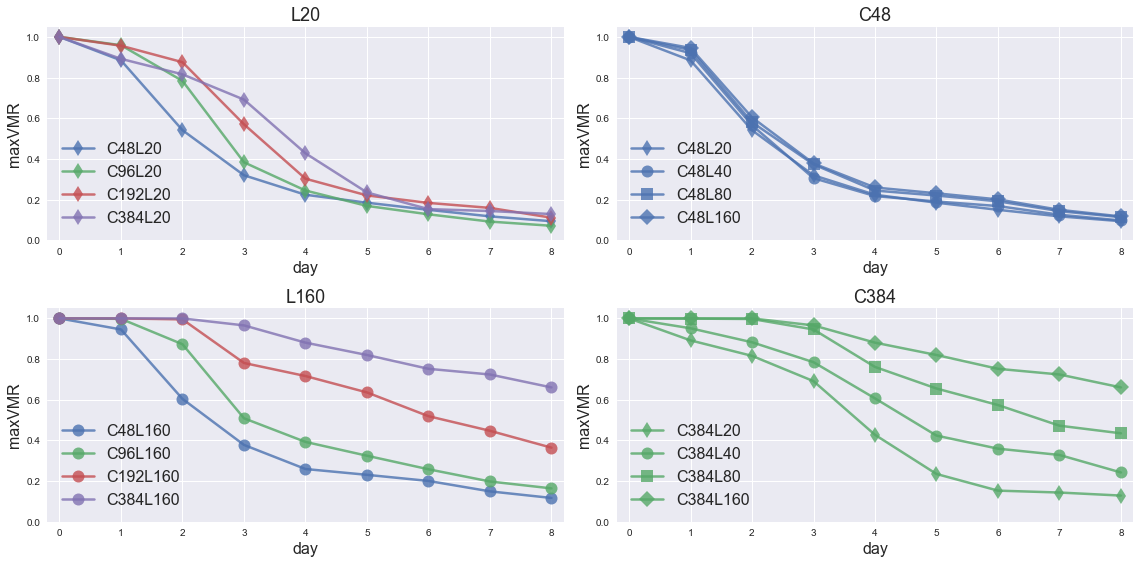

In [5]:
dr = ds['plume01'] #only look at the "standard plume"

titlesize, labelsize = [18,16]
fig, axes = plt.subplots(2,2,figsize=[16,8])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylabel('maxVMR',fontsize=labelsize);ax.set_xlabel('day',fontsize=labelsize)
    ax.set_ylim([0,1.05]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=3)

for j,Vres in enumerate(Vres_list[0:4:3]):
    ax = axes[j][0]
    ax.set_title(label='L{0}'.format(Vres),fontsize=titlesize)
    
    for i,Hres in enumerate(Hres_list):
        marker = marker_list[j]; color = color_list[i]; 

        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
        
    set_detail(ax)
        
for i,Hres in enumerate(Hres_list[0:4:3]):
    ax = axes[i][1]
    ax.set_title(label='C{0}'.format(Hres),fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[j]; color = color_list[i]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)

    set_detail(ax)
        
fig.tight_layout()
#fig.savefig('plume01_4x2verbose.png',dpi=200)

## Perhaps a clearer plot

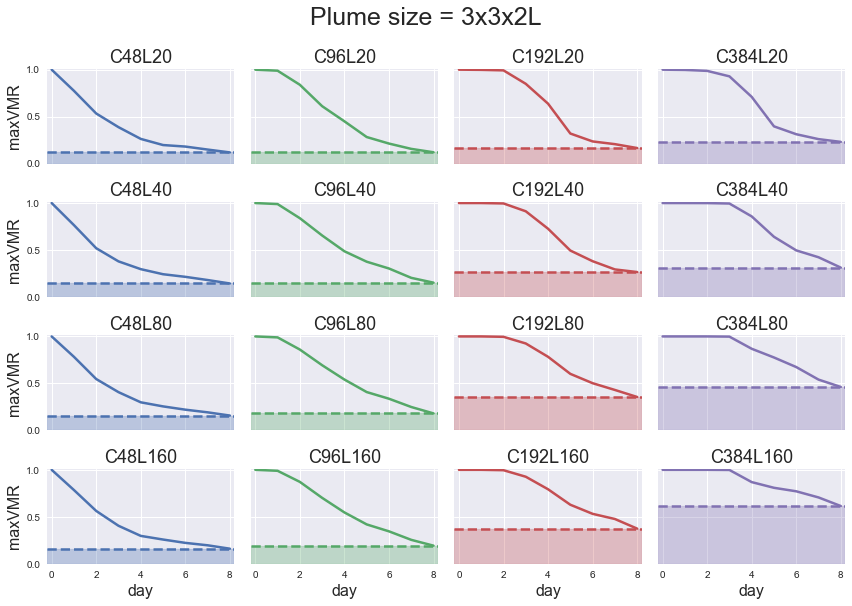

In [6]:
dr = ds['plume04'] 

fig, axes = plt.subplots(4,4,figsize=[12,8])

color_list = palette

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        ax = axes[j][i]
        color = color_list[i]
        
        dr_temp = dr.sel(Hres=Hres,Vres=Vres)
        ax.plot(dr_temp,label='C{0}L{1}'.format(Hres,Vres),
                linestyle='-',linewidth=linewidth,color=color)
        ax.axhline(dr_temp.isel(time=-1),linewidth=linewidth,linestyle='--',color=color)
        ax.axhspan(0.0, dr_temp.isel(time=-1), alpha=0.3,color=color)
        ax.set_ylim([0,1.01]);ax.set_xlim([-0.2,8.2])

        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=titlesize)
        
        if Hres == 48:
            ax.set_ylabel('maxVMR',fontsize=labelsize)
        else:
            ax.yaxis.set_ticklabels([])
            
        if Vres == 160:
            ax.set_xlabel('day',fontsize=labelsize)
        else:
            ax.xaxis.set_ticklabels([])
            
fig.suptitle('Plume size = 3x3x2L',fontsize=25,y=1.05)
fig.tight_layout()

# bbox_inches='tight' ensures the suptitle is not removed
fig.savefig('plume04_4x4plot.png',dpi=200,bbox_inches='tight')

## Plot the maxVMR at the last day

In [7]:
ds_last = ds.isel(time=-1)

In [8]:
dr_last = ds_last['plume04'].drop('time')
dr_last.to_dataframe().unstack().T#.to_excel('plume04_lastday.xlsx')

Hres               48        96        192       384
        Vres                                        
plume04 20    0.119348  0.120923  0.165914  0.231450
        40    0.144062  0.152805  0.265751  0.312796
        80    0.158039  0.180840  0.355578  0.462149
        160   0.160600  0.192875  0.374095  0.614614

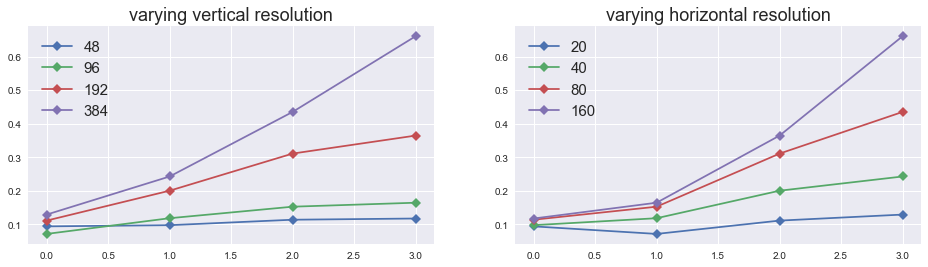

In [10]:
dr_last = ds_last['plume01']
fig, axes = plt.subplots(1,2,figsize=[16,4])

ax = axes[0]
for i,Hres in enumerate(Hres_list):
    ax.plot(dr_last.sel(Hres=Hres),marker='D',label=Hres)
    
ax.set_title('varying vertical resolution',fontsize=titlesize)
ax.legend(fontsize=15)


ax = axes[1]
for j,Vres in enumerate(Vres_list):
    ax.plot(dr_last.sel(Vres=Vres),marker='D',label=Vres)
    
ax.set_title('varying horizontal resolution',fontsize=titlesize)
ax.legend(fontsize=15)


## Effect of plume size, only look at C384Lxx or CxxL160

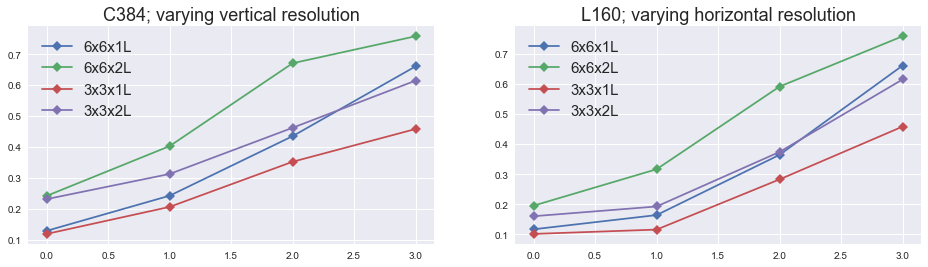

In [11]:
fig, axes = plt.subplots(1,2,figsize=[16,4])

label_list=['6x6x1L','6x6x2L','3x3x1L','3x3x2L']

ax = axes[0]
for i in range(4):
    varname = 'plume0{0}'.format(i+1)
    ax.plot(ds_last[varname].sel(Hres=384),marker='D',label=label_list[i])
    
ax.set_title('C384; varying vertical resolution',fontsize=titlesize)
ax.legend(fontsize=15)


ax = axes[1]
for i in range(4):  
    varname = 'plume0{0}'.format(i+1)
    ax.plot(ds_last[varname].sel(Vres=160),marker='D',label=label_list[i])
    
ax.set_title('L160; varying horizontal resolution',fontsize=titlesize)
ax.legend(fontsize=15)

### Try contour plot

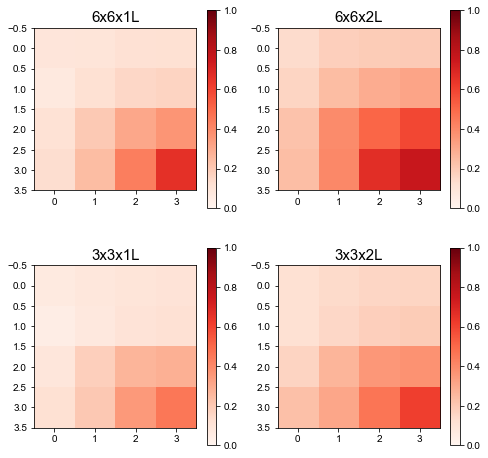

In [20]:
sns.reset_orig()

plt.figure(figsize=[8,8])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(ds_last['plume0{0}'.format(i+1)],vmax=1.0,vmin=0.0,cmap='Reds')
    #plt.contourf(ds_last['plume0{0}'.format(i)],vmax=1.0,vmin=0.0,cmap='Reds')
    plt.colorbar()
    plt.title(label_list[i],fontsize=15)
    
sns.set()

## Dynamic fields

In [13]:
# Extract dynamics
Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

ds_dyn = FV3log.extract_HsVs(maindir, ['PS'], Hres_list, Vres_list, pos=6)


 open: C48L20_std.log C48L40_std.log C48L80_std.log C48L160_std.log 
 open: C96L20_std.log C96L40_std.log C96L80_std.log C96L160_std.log 
 open: C192L20_std.log C192L40_std.log C192L80_std.log C192L160_std.log 
 open: C384L20_std.log C384L40_std.log C384L80_std.log C384L160_std.log 

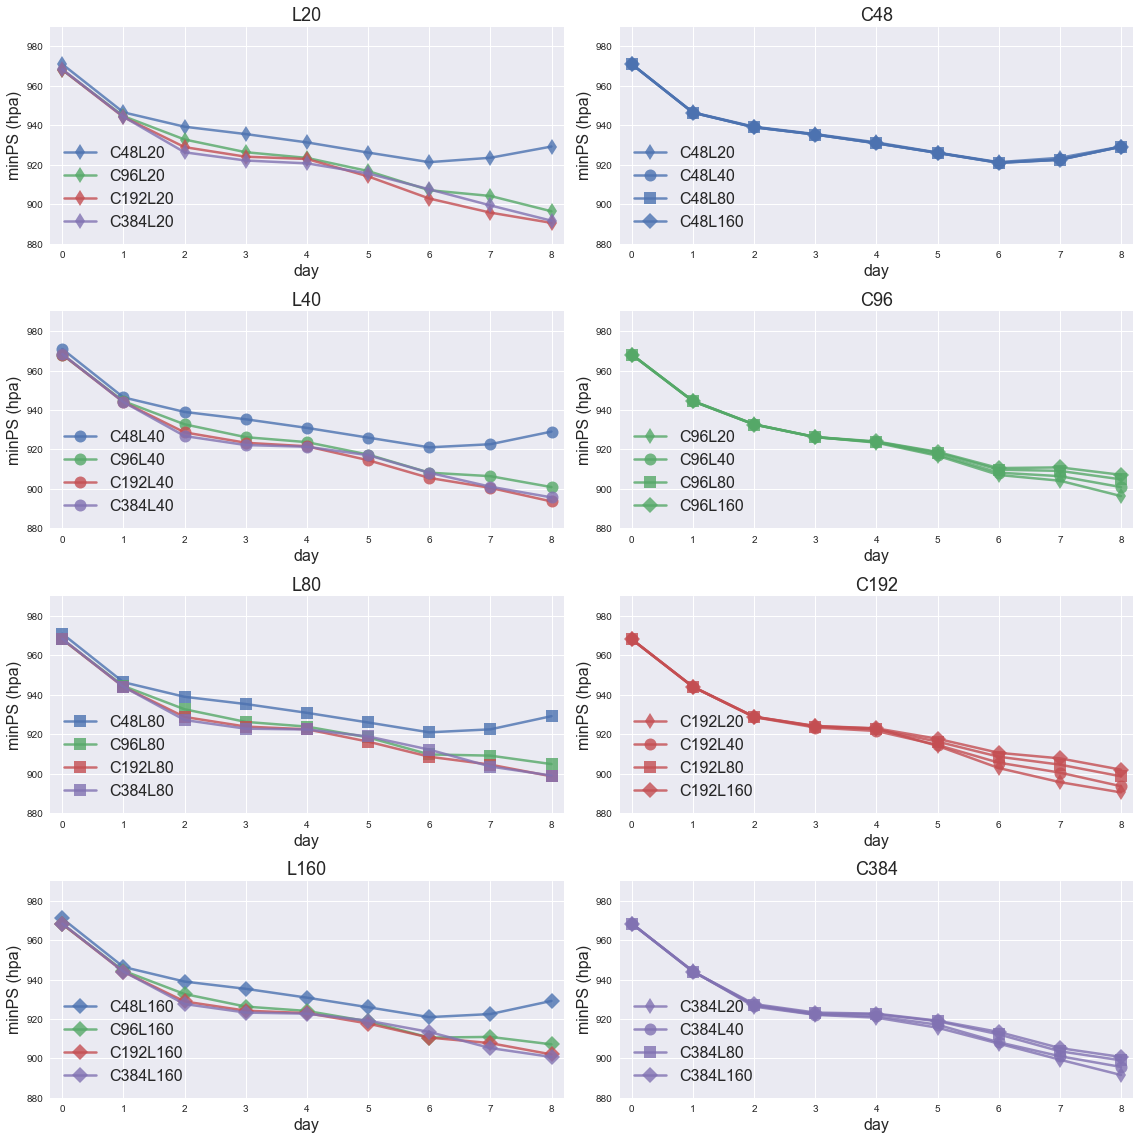

In [14]:
dr_ps = ds_dyn['PS'] 

titlesize, labelsize = [18,16]
fig, axes = plt.subplots(4,2,figsize=[16,16])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylabel('minPS (hpa)',fontsize=labelsize);ax.set_xlabel('day',fontsize=labelsize)
    ax.set_ylim([880,990]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=3)

for j,Vres in enumerate(Vres_list):
    ax = axes[j][0]
    ax.set_title(label='L{0}'.format(Vres),fontsize=titlesize)
    
    for i,Hres in enumerate(Hres_list):
        marker = marker_list[j]; color = color_list[i]; 

        ax.plot(dr_ps.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
        
    set_detail(ax)
        
for i,Hres in enumerate(Hres_list):
    ax = axes[i][1]
    ax.set_title(label='C{0}'.format(Hres),fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[j]; color = color_list[i]; 
        
        ax.plot(dr_ps.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)

    set_detail(ax)
        
fig.tight_layout()
fig.savefig('PS_4x2verbose.png',dpi=200)

In [15]:
dr_last_ps = dr_ps.isel(time=-1).drop('time')
dr_last_ps.to_dataframe().unstack()#.to_excel('PS_lastday.xlsx')

PS                                    
Vres         20          40          80          160
Hres                                                
48    929.211914  929.059509  929.161499  929.161560
96    896.337341  900.893738  904.828735  907.121155
192   890.463013  893.604919  898.619751  902.000183
384   891.572021  895.663452  899.007996  900.707275

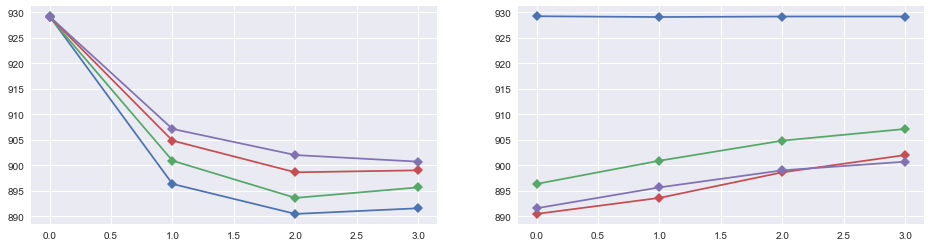

In [16]:
fig, axes = plt.subplots(1,2,figsize=[16,4])

for j,Vres in enumerate(Vres_list):
    ax = axes[0]
    ax.set_title('',fontsize=titlesize)
    ax.plot(dr_last_ps.sel(Vres=Vres),marker='D')
    
    
for i,Hres in enumerate(Hres_list):
    ax = axes[1]
    ax.set_title('',fontsize=titlesize)
    ax.plot(dr_last_ps.sel(Hres=Hres),marker='D')